# StockMarket Tweets Analysis

Economists believe that one of the most parameters that can effect the markts is the thoughts of poeple who are 
trading in that market.So, this project aims to analyze 1000 perivous tweets as a source where the public shows their 
toughts, and we will focuse on just stock market.
To be exact, this project will answer to the following questions:
    1.which words are the most common? can we visualize it to have better understanding?
    2.which hashtags are used most?
    3.which accounts are tagged most?
    4.Is any specific hour that has the most tweets?
    5.which tweets influence most based on public metrics including comments,likes, retweets, and quots?

### Installations

In [224]:
#all the needed packages are added here

!pip install textblob
!pip install tweepy
!pip install pillow

import tweepy
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from wordcloud import WordCloud

# import TwitterCollector
from TwitterCollector import TwitterCollector

# you will use this later to specify the collection time window
from datetime import datetime

# you will use it to omit the words that should not count as the most repeated one
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arianayazdi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Collecting Data from Twitter

In [21]:
#connecting to twitter by personal bareer token which is given from twitter 

bearer_token= r"AAAAAAAAAAAAAAAAAAAAAI6RhwEAAAAAHOa71KfHtnqa2XMT%2FhrALmJcbW4%3DGMQxLm7HNiwzz10KYHmVDohY9wp6Dsfc5KHx9vJf0ZJTzT3rZk"
tc= TwitterCollector(bearer_token=bearer_token)


In [54]:
#Selecting what tweets we are looking for

query = 'stockmarket -is:retweet lang:en'

In [24]:
#Data will be collected and saved to a json file
recent_tweets = tc.fetch_recent_tweets(query = query  # specify the search query
                                            , tweets_cnt = 1000  # specify the number of tweets you want to collect
                                            , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
                                            )


In [102]:
recent_tweets.keys()

dict_keys(['collection_type', 'collection_timestamp', 'query', 'tweet_cnt', 'tweets'])

In [103]:
type(recent_tweets['tweets'])

list

In [104]:
recent_tweets['tweets'][0].keys()

dict_keys(['entities', 'author_id', 'edit_history_tweet_ids', 'id', 'lang', 'source', 'context_annotations', 'text', 'created_at', 'public_metrics', 'possibly_sensitive'])

In [105]:
recent_tweets['tweets'][0]['author_id']

'1355200837790871557'

## Analysis

To have the same answers in each time of runnig code, use the saved file instead of running the above collecting codes.

In [101]:
#opening the saved file having our tweets data

with open('recent_post_stockmarket -is-retweet lang-en_1000.json') as json_file:
    json_cc_data=json.load(json_file)

In [109]:
json_cc_data.keys()

dict_keys(['collection_type', 'collection_timestamp', 'query', 'tweet_cnt', 'tweets'])

In [115]:
json_cc_data['tweets'][0].keys()

dict_keys(['entities', 'author_id', 'edit_history_tweet_ids', 'id', 'lang', 'source', 'context_annotations', 'text', 'created_at', 'public_metrics', 'possibly_sensitive'])

In [119]:
json_cc_data['tweets'][8]['text']

"ALERT..💥 \n\n️❇ 2023 recession won't be 'terrible,' economist says\n️❇ Minnesota's economy shrank for a second quarter, meeting one definition of recession\n #recession #DayTrading #DayTrader #Trading #StockMarket"

In [126]:
#Converting the tweets part of data to a data frame for furthure analysis.

df_cc_data_tweets=pd.DataFrame(json_cc_data['tweets'])

In [127]:
df_cc_data_tweets.head()


,entities,author_id,edit_history_tweet_ids,id,lang,source,context_annotations,text,created_at,public_metrics,possibly_sensitive,attachments,referenced_tweets,in_reply_to_user_id,geo
0,"{'hashtags': [{'start': 34, 'end': 41, 'tag': ...",1355200837790871557,[1578423973310005248],1578423973310005248,en,Twitter Web App,"[{'domain': {'id': '46', 'name': 'Business Tax...",Zion Oil https://t.co/aW1aWuuUgQ #nasdaq $loo...,2022-10-07T16:36:15.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,NaN,NaN,NaN,NaN
1,"{'hashtags': [{'start': 0, 'end': 8, 'tag': 'O...",707079170644271104,[1578423920792698903],1578423920792698903,en,TickwatcherMF,"[{'domain': {'id': '46', 'name': 'Business Tax...",#Options Flow Stream Update $AAPL $TSLA $SPY $...,2022-10-07T16:36:03.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,"{'media_keys': ['3_1578423915117805572', '3_15...",NaN,NaN,NaN
2,"{'hashtags': [{'start': 0, 'end': 8, 'tag': 'O...",706297891070087168,[1578423913016459269],1578423913016459269,en,OptionsMaxPain_Post,"[{'domain': {'id': '46', 'name': 'Business Tax...",#Options Flow Stream Update $AAPL $TSLA $SPY $...,2022-10-07T16:36:01.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,"{'media_keys': ['3_1578423906913746957', '3_15...",NaN,NaN,NaN
3,"{'hashtags': [{'start': 0, 'end': 12, 'tag': '...",1567530148156608514,[1578423908864503808],1578423908864503808,en,Twitter for Android,"[{'domain': {'id': '46', 'name': 'Business Tax...",#stockmarket $Nbio #stockstotrade $Nbio this s...,2022-10-07T16:36:00.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,NaN,NaN,NaN,NaN
4,"{'hashtags': [{'start': 99, 'end': 108, 'tag':...",1456666520,[1578423894503223296],1578423894503223296,en,Twitter Web App,"[{'domain': {'id': '46', 'name': 'Business Tax...",https://t.co/kkAcrAROnr : Get historical data ...,2022-10-07T16:35:56.000Z,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",False,NaN,NaN,NaN,NaN


**Most Common Words**

In [153]:
# this will add all the words in all tweets in a one list

words = []
for i in range(len(df_cc_data_tweets['text'])):
    words.extend(df_cc_data_tweets_text[i].split())
    

In [154]:
words


['Zion',
 'Oil',
 'https://t.co/aW1aWuuUgQ',
 '#nasdaq',
 '$looks',
 '$titano',
 '$libero',
 '$tomb',
 '#investing',
 '#finance',
 '#trading',
 '#stockmarket',
 '#ftse100',
 '#dowjones',
 '#nasdaq',
 '$tomb',
 '$treeb',
 '#yieldfarming',
 '#apy',
 '#crypto',
 '#btc',
 '#ethereum',
 '$ftm',
 '$avax',
 '$scream',
 '#Options',
 'Flow',
 'Stream',
 'Update',
 '$AAPL',
 '$TSLA',
 '$SPY',
 '$QQQ',
 '$NDX',
 '$SPX',
 '#OptionsTrading',
 '#OptionsFlow',
 '#optionstrade',
 '#optiontrading',
 '#stock',
 '#stocks',
 '#StockMarket',
 '#Investment',
 '#investing',
 '#invest',
 '#investor',
 '#investors',
 '#UOA',
 'https://t.co/B7BWRcVOEf',
 'https://t.co/2UQdpRrRLJ',
 '#Options',
 'Flow',
 'Stream',
 'Update',
 '$AAPL',
 '$TSLA',
 '$SPY',
 '$QQQ',
 '$NDX',
 '$SPX',
 '#OptionsTrading',
 '#OptionsFlow',
 '#optionstrade',
 '#optiontrading',
 '#stock',
 '#stocks',
 '#StockMarket',
 '#Investment',
 '#investing',
 '#invest',
 '#investor',
 '#investors',
 '#UOA',
 'https://t.co/Jj64hrpqst',
 'https://t.c

In [165]:
#Cleaning the data before analysis

for i in range(0, len(words)):
    words[i] = words[i].lower()

for i in range(0,len(words)):
    words[i] = words[i].replace('.', '')
    words[i] = words[i].replace(',', '')
    words[i] = words[i].replace('?','')
    words[i] = words[i].replace('https:','')
    words[i] = words[i].replace('//tco/','')
    
#nltk stopwords 
stopwords = nltk.corpus.stopwords.words('english')
#add some other stopwords based on the topic and them to the list
list = ['stock','market','stockmarket','odds','indicator','view','happen','try','scann']
for i in list:
    stopwords.append(i)
    


In [200]:
#most commen words in tweets

words2 = [] # our accumulator list

for w in words:
    if w not in stopwords and len(w) > 1 and '#' not in w and '@' not in w:
        words2.append(w)
        
c2 = Counter(words2)
c2.most_common(10)

[('$amzn', 211),
 ('scan', 182),
 ('$tsla', 160),
 ('$aapl', 153),
 ('$spy', 137),
 ('$msft', 133),
 ('score', 128),
 ('indicators:', 119),
 ('day', 118),
 ('like', 110)]

In [ ]:
#most common words in world cloud

#converting word list to a string
text=''
for t in words2:
    text += t + ' '

wordcloud = WordCloud(width=800, height=400, colormap='rainbow').generate(text)

plt.figure(figsize=(20,10)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.savefig('my_word_cloud.png') # save as PNG file
plt.savefig('my_word_cloud.pdf') # save as PDF file
plt.show()  # show in Jupyter notebook

In [177]:
#most common hastags

words3 = [] # our accumulator list

for w in words:
    if w not in stopwords and len(w) > 1 and '#' in w:
        words3.append(w)

c3 = Counter(words3)
c3.most_common(10)

[('#stockmarket', 989),
 ('#stocks', 438),
 ('#investing', 310),
 ('#trading', 290),
 ('#stock', 232),
 ('#investment', 169),
 ('#options', 133),
 ('#bitcoin', 110),
 ('#invest', 98),
 ('#investor', 94)]

In [178]:
#most common tagged accounts

words4 = [] # our accumulator list

for w in words:
    if w not in stopwords and len(w) > 1 and '@' in w :
        words4.append(w)

c4 = Counter(words4)
c4.most_common(10)

[('@chartmojo', 25),
 ('@stockholdingin', 24),
 ('@yta_school', 20),
 ('@kuttrapali26', 19),
 ('@caniravkaria', 14),
 ('@wsjmarkets', 13),
 ('@technicalchart1', 13),
 ('@kommawarswapnil', 12),
 ('@nishkumar1977', 11),
 ('@chartdekho_', 10)]

**Most common Source**


In [233]:
df_cc_data_tweets.loc[0,'source']

'Twitter Web App'

In [234]:
sources = [] # our accumulator list

for i in range(0, len(recent_tweets['tweets'])):
    sources.append(df_cc_data_tweets.loc[i,'source'])

c5 = Counter(sources)
c5.most_common(3)

[('Twitter Web App', 265), ('Tickeron', 119), ('Twitter for Android', 116)]

**most common time**

In [235]:
df_cc_data_tweets['hour'] = pd.DatetimeIndex(df_cc_data_tweets['created_at']).hour

In [236]:
df_cc_data_tweets['hour'].unique()

array([16, 15, 14])

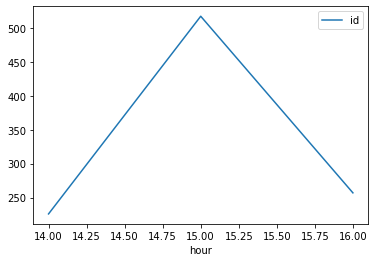

,id,hour
index,,
14,226,14
15,517,15
16,257,16


In [237]:
tweet_by_hour = pd.DataFrame(df_cc_data_tweets.groupby(['hour']).count()['id'])
tweet_by_hour['hour'] = tweet_by_hour.index
tweet_by_hour.rename(columns={"id":"count"})
tweet_by_hour.index.names = ['index']
tweet_by_hour.plot(x="hour", y="id", kind="line")
plt.show()
tweet_by_hour


**most influencing tweets**

In [219]:
df_cc_data_tweets['influence_score'] = None
for i in range(0, len(df_cc_data_tweets)):

    df_cc_data_tweets['influence_score'][i] = df_cc_data_tweets['public_metrics'][i]['retweet_count'] + df_cc_data_tweets['public_metrics'][i]['reply_count'] + df_cc_data_tweets['public_metrics'][i]['like_count'] + df_cc_data_tweets['public_metrics'][i]['quote_count']
    
    
    

/var/folders/bg/nwrfqr3x53x6dwwjtgkf3bl80000gn/T/ipykernel_3614/2246394527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cc_data_tweets['influence_score'][i] = df_cc_data_tweets['public_metrics'][i]['retweet_count'] + df_cc_data_tweets['public_metrics'][i]['reply_count'] + df_cc_data_tweets['public_metrics'][i]['like_count'] + df_cc_data_tweets['public_metrics'][i]['quote_count']


In [220]:
df_cc_data_tweets.head()



,entities,author_id,edit_history_tweet_ids,id,lang,source,context_annotations,text,created_at,public_metrics,possibly_sensitive,attachments,referenced_tweets,in_reply_to_user_id,geo,hour,influence_score
0,"{'hashtags': [{'start': 34, 'end': 41, 'tag': ...",1355200837790871557,[1578423973310005248],1578423973310005248,en,Twitter Web App,"[{'domain': {'id': '46', 'name': 'Business Tax...",Zion Oil https://t.co/aW1aWuuUgQ #nasdaq $loo...,2022-10-07T16:36:15.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,NaN,NaN,NaN,NaN,16,0
1,"{'hashtags': [{'start': 0, 'end': 8, 'tag': 'O...",707079170644271104,[1578423920792698903],1578423920792698903,en,TickwatcherMF,"[{'domain': {'id': '46', 'name': 'Business Tax...",#Options Flow Stream Update $AAPL $TSLA $SPY $...,2022-10-07T16:36:03.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,"{'media_keys': ['3_1578423915117805572', '3_15...",NaN,NaN,NaN,16,0
2,"{'hashtags': [{'start': 0, 'end': 8, 'tag': 'O...",706297891070087168,[1578423913016459269],1578423913016459269,en,OptionsMaxPain_Post,"[{'domain': {'id': '46', 'name': 'Business Tax...",#Options Flow Stream Update $AAPL $TSLA $SPY $...,2022-10-07T16:36:01.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,"{'media_keys': ['3_1578423906913746957', '3_15...",NaN,NaN,NaN,16,0
3,"{'hashtags': [{'start': 0, 'end': 12, 'tag': '...",1567530148156608514,[1578423908864503808],1578423908864503808,en,Twitter for Android,"[{'domain': {'id': '46', 'name': 'Business Tax...",#stockmarket $Nbio #stockstotrade $Nbio this s...,2022-10-07T16:36:00.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,NaN,NaN,NaN,NaN,16,0
4,"{'hashtags': [{'start': 99, 'end': 108, 'tag':...",1456666520,[1578423894503223296],1578423894503223296,en,Twitter Web App,"[{'domain': {'id': '46', 'name': 'Business Tax...",https://t.co/kkAcrAROnr : Get historical data ...,2022-10-07T16:35:56.000Z,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",False,NaN,NaN,NaN,NaN,16,1


In [221]:
df_cc_data_tweets.sort_values('influence_score', ascending = False).head(3)['text']

668    Here’s the link to the entire conversation wit...
240    Uber $UBER Stock Went Up After It Made a Deal ...
290    #tyde #bbig #StockMarket #manipulation #fraud ...
Name: text, dtype: object